<h1 style='text-align: center; color: blue; font-size: 3.5rem;'>Shervin Iranaghideh</h1>

Mean absolute error: 22.99
Residual sum of squares (MSE): 899.08
R2-score: 0.76


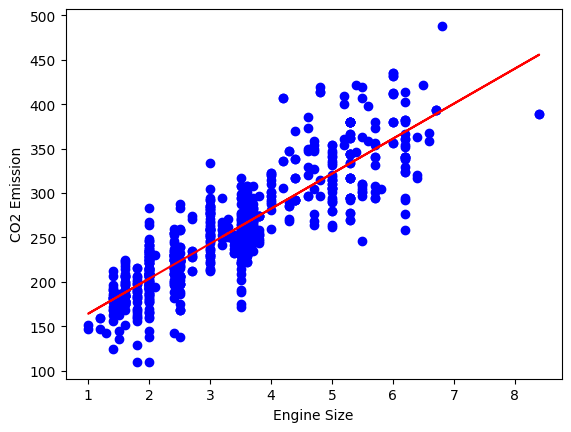

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score


df = pd.read_csv("./FuelConsumption.csv")
df = df[['ENGINESIZE', 'CO2EMISSIONS']]

msk = np.random.rand(len(df)) < .7
train = df[msk]
test = df[~msk]

reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
